# Classifiction problem
* Linear Data
* Non-linear Data

## Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
pd.options.mode.chained_assignment = None
from tabulate import tabulate

## Create a function to extract the data points

**The user provide the file location and required label to the class**

In [2]:
def extract_points(path, label):
    with open(path, "r") as f:
        lines = f.readlines()
    data_points = []
    for line in lines:
        line = line.strip()
        first, second = line.split()
        data_points.append([float(first),float(second), label])
    return data_points

# Linear Class
## Extract the points of 3 classes from Linearly separable

In [3]:
class_1_points = extract_points(r"C:\Users\mishr\Test Codes\Group30\Classification\LS_Group30\Class1.txt", 1)
class_2_points = extract_points(r"C:\Users\mishr\Test Codes\Group30\Classification\LS_Group30\Class2.txt", 2)
class_3_points = extract_points(r"C:\Users\mishr\Test Codes\Group30\Classification\LS_Group30\Class3.txt", 3)

## Create a dataframe using pandas to keep features and class label together

**Once the classes have been formed we neeed to join them and form a data frame**

In [4]:
total_data = class_1_points+class_2_points+class_3_points

In [5]:
# forming a data frame

linear_data = pd.DataFrame(total_data, columns=["X1", "X2", "label"])

In [6]:
linear_data

,X1,X2,label
0,19.8100,-5.67060,1
1,16.8130,-4.53270,1
2,21.7920,-7.60480,1
3,16.9420,-4.84060,1
4,18.1280,-4.93910,1
...,...,...,...
1495,-1.7991,-4.91820,3
1496,-2.3629,-0.23106,3
1497,-4.8825,-2.65940,3
1498,-2.2680,-3.32190,3


## Display the points of all three classes

[]

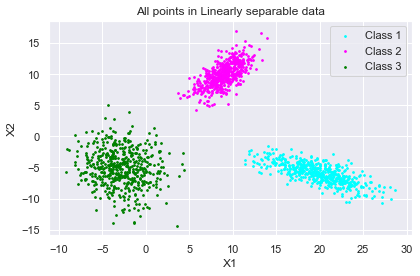

In [7]:
cl1 = linear_data[linear_data.label==1]
cl2 = linear_data[linear_data.label==2]
cl3 = linear_data[linear_data.label==3]
sns.set()
plt.scatter(cl1['X1'], cl1['X2'], color = "cyan", label = "Class 1", s = 3)
plt.scatter(cl2['X1'], cl2['X2'], color = "magenta", label = "Class 2", s = 3)
plt.scatter(cl3['X1'], cl3['X2'], color = 'green', label = "Class 3", s = 3)
plt.legend()
plt.title("All points in Linearly separable data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.tight_layout()
plt.plot()

## Lets define a function to train the neuron

**This will be a 2 class problem**
* The function sigmoid returns the value after applying logistic function
* The function sigmoid_der returns the differentiation of sigmoidal(logistic) function
* The train_neuron train the neuron for classification

In [8]:
import math
def sigmoid(x):
    return 1/(1+np.exp(-x))
    #return 1/(1+math.exp(-x))

def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))
    #return x*(1-x)
def train_neuron(data, label):
    samples, features = data.shape
    data = np.hstack((np.ones((samples,1)),data)).reshape((-1,3))
    label = label.reshape((-1,1))
    weights = np.random.rand(3).reshape((-1,1))
    epoch_error = []
    epoch = 0
    while epoch<10000:
        epoch +=1
        data_input = data
        in_neuron = np.dot(data_input,weights)
        out_neuron = sigmoid(in_neuron)
        
        error = out_neuron-label
        sqr_error = error**2
        avg_error = sqr_error.sum()
        epoch_error.append((epoch,avg_error/(2*samples)))
        
        deriv = error*sigmoid_der(out_neuron)
        
        inputs = data_input.T
        final_derivative = np.dot(inputs,deriv)
        
        weights = weights-0.4*final_derivative
    
    return weights, epoch_error
        
    

## Defining a function for prediction

* The predict function predicts the values (classify)

In [9]:
''' We require a function to predict'''

def predict(W,x):
    samples, features = x.shape
    x = np.hstack((np.ones((samples,1)),x)).reshape((-1,3))
    W = W.reshape((-1,1))
    pre = np.dot(x,W)
    pre[pre>0] = 1
    pre[pre<=0] = 0
    return pre

## define a function to print confusion matrix

In [10]:
def confuse(original,predicted,type_data):
    l_1_1 = 0
    l_1_2 = 0
    l_1_3 = 0
    l_2_1 = 0
    l_2_2 = 0
    l_2_3 = 0
    l_3_1 = 0
    l_3_2 = 0
    l_3_3 = 0
    for i in range(original.shape[0]):
        if original[i] ==1 and predicted[i] ==1:
            l_1_1+=1
        if original[i] ==1 and predicted[i] ==2:
            l_1_2+=1
        if original[i] ==1 and predicted[i] ==3:
            l_1_3+=1
        if original[i] ==2 and predicted[i] ==1:
            l_2_1+=1
        if original[i] ==2 and predicted[i] ==2:
            l_2_2+=1
        if original[i] ==2 and predicted[i] ==3:
            l_2_3+=1
        if original[i] ==3 and predicted[i] ==1:
            l_3_1+=1
        if original[i] ==3 and predicted[i] ==2:
            l_3_2+=1
        if original[i] ==3 and predicted[i] ==3:
            l_3_3+=1
    table = [[" ","Class 1","Class 2","Class 3"],["Class 1", l_1_1,l_1_2,l_1_3],["Class 2", l_2_1,l_2_2,l_2_3],["Class 3",l_3_1,l_3_2,l_3_3]]
    print(f"Confusion Matrix for {type_data} Data ")
    print(tabulate(table))
    print("\n")
    print(f"The Classification accuracy for {type_data} data is ")
    acc =  (l_1_1+l_2_2+l_3_3)/(l_1_1+l_1_2+l_1_3+l_2_1+l_2_2+l_2_3+l_3_1+l_3_2+l_3_3)
    print(acc)

## In the linear dataframe we concatinate 3 columns 
* class1 - consider class 1 = 0 and rest as class 1
* class2 - consider class 2 = 0 and rest as class 1
* class3 - consider class 3 = 0 and rest as class 1

In [11]:
linear_data['class_1'] = 0
linear_data['class_2'] = 0
linear_data['class_3'] = 0

## feed the class1 to class3 with values considering the problem as 2 class problem

In [12]:
linear_data.class_1[linear_data['label']==1] = 0
linear_data.class_1[linear_data['label']!=1] = 1

linear_data.class_2[linear_data['label']==2] = 0
linear_data.class_2[linear_data['label']!=2] = 1

linear_data.class_3[linear_data['label']==3] = 0
linear_data.class_3[linear_data['label']!=3] = 1

In [13]:
linear_data

,X1,X2,label,class_1,class_2,class_3
0,19.8100,-5.67060,1,0,1,1
1,16.8130,-4.53270,1,0,1,1
2,21.7920,-7.60480,1,0,1,1
3,16.9420,-4.84060,1,0,1,1
4,18.1280,-4.93910,1,0,1,1
...,...,...,...,...,...,...
1495,-1.7991,-4.91820,3,1,1,0
1496,-2.3629,-0.23106,3,1,1,0
1497,-4.8825,-2.65940,3,1,1,0
1498,-2.2680,-3.32190,3,1,1,0


In [14]:
linear_data = linear_data.sample(frac=1)

In [15]:
train = linear_data.iloc[0:1050,:]
test = linear_data.iloc[1050:,:]

In [16]:
train

,X1,X2,label,class_1,class_2,class_3
1310,-6.20370,-8.8914,3,1,1,0
1281,-2.65480,-2.8808,3,1,1,0
1430,-3.71340,-8.9805,3,1,1,0
1401,-2.51590,-2.8631,3,1,1,0
597,7.57130,6.9618,2,1,0,1
...,...,...,...,...,...,...
1300,-1.22760,-6.0379,3,1,1,0
756,8.06060,8.8240,2,1,0,1
391,25.99400,-9.8415,1,0,1,1
1348,0.15938,-3.3475,3,1,1,0


In [17]:
test

,X1,X2,label,class_1,class_2,class_3
875,9.1681,10.0190,2,1,0,1
101,20.0130,-4.4222,1,0,1,1
203,20.5460,-6.9786,1,0,1,1
1407,4.4470,-5.3436,3,1,1,0
362,20.2840,-6.5676,1,0,1,1
...,...,...,...,...,...,...
994,8.7465,9.9181,2,1,0,1
930,9.1179,9.1505,2,1,0,1
1214,-1.0803,-10.9330,3,1,1,0
164,18.1420,-4.9030,1,0,1,1


## We will apply the perceptron for each class seprately

In [18]:
train_1 = train[['X1','X2']]
label_1 = train.class_1

train_2 = train[['X1','X2']]
label_2 = train.class_2

train_3 = train[['X1','X2']]
label_3 = train.class_3

In [19]:
train_1 = np.array(train_1).reshape((-1,2))
train_2 = np.array(train_2).reshape((-1,2))
train_3 = np.array(train_3).reshape((-1,2))

label_1 = np.array(label_1).reshape((-1,1))
label_2 = np.array(label_2).reshape((-1,1))
label_3 = np.array(label_3).reshape((-1,1))

### Applying the perceptron individualy 

In [20]:
W_1, ep_vs_er_1 = train_neuron(train_1, label_1)

W_2, ep_vs_er_2 = train_neuron(train_2, label_2)

W_3, ep_vs_er_3 = train_neuron(train_3, label_3)

<ipython-input-8-9ebaa709a8a3>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


## Defining a function to plot the decision region

In [21]:
def plot_decision_boundry(X,Y,w):
    h = 0.02
    x_min, x_max = X[:,0].min() - 100*h, X[:,0].max() + 100*h
    y_min, y_max = X[:,1].min() - 100*h, X[:,1].max() + 100*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = predict(w,np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    Z[Z==1] = 1
    Z[Z==0] = 2
    plt.figure(figsize=(8,8))
    plt.contourf(xx, yy, Z, alpha=0.25,cmap = 'seismic')
    plt.contour(xx, yy, Z, colors='k', linewidths=0.5)
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.legend

## Plotting the decision boundary for individual classes

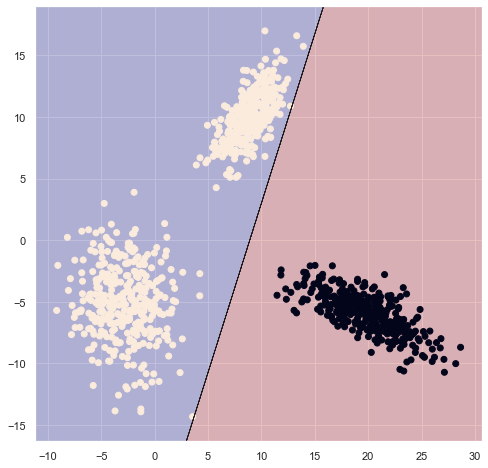

In [22]:
plot_decision_boundry(train_1,label_1,W_1)

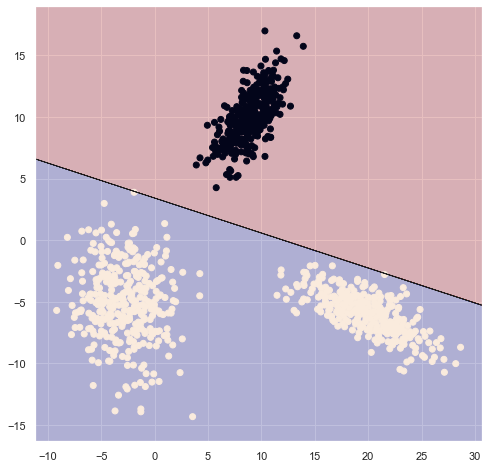

In [23]:
plot_decision_boundry(train_2,label_2,W_2)

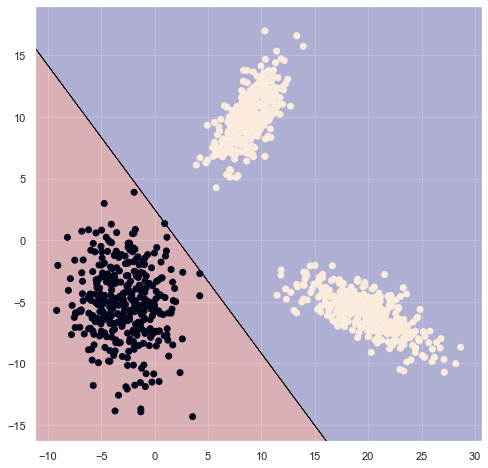

In [24]:
plot_decision_boundry(train_3,label_3,W_3)

## Plotting the error vs epoch for all three cases

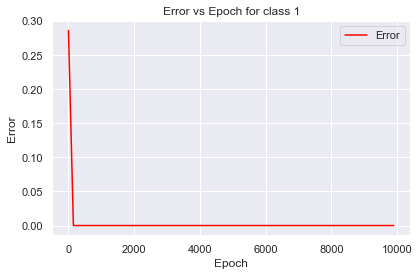

In [25]:
sns.set()
plt.plot(*zip(*ep_vs_er_1[::150]), color = 'red', label = "Error")
plt.title("Error vs Epoch for class 1")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.tight_layout()

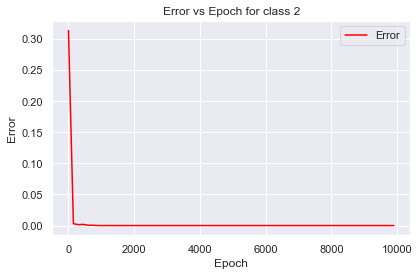

In [26]:
sns.set()
plt.plot(*zip(*ep_vs_er_2[::150]), color = 'red', label = "Error")
plt.title("Error vs Epoch for class 2")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.tight_layout()

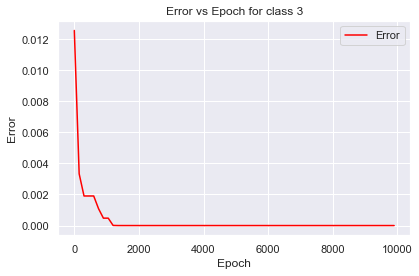

In [27]:
sns.set()
plt.plot(*zip(*ep_vs_er_3[::150]), color = 'red', label = "Error")
plt.title("Error vs Epoch for class 3")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.tight_layout()


## Plotting decision surface together

In [28]:
def plot_decision_boundry_three(X,Y,w1,w2,w3):
    h = 0.02
    x_min, x_max = X[:,0].min() - 100*h, X[:,0].max() + 100*h
    y_min, y_max = X[:,1].min() - 100*h, X[:,1].max() + 100*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z1 = predict(w1,np.c_[xx.ravel(), yy.ravel()]).reshape((1,-1))
    Z2 = predict(w2,np.c_[xx.ravel(), yy.ravel()]).reshape((1,-1))
    Z3 = predict(w3,np.c_[xx.ravel(), yy.ravel()]).reshape((1,-1))
    final = np.zeros(Z1.shape)
    for i in range(Z1.shape[1]):
        if Z2[0][i] == 0:
            final[0][i] = 2
        if Z3[0][i] ==0:
            final[0][i] = 3
        if Z1[0][i]==0:
            final[0][i]=1
    final = final.reshape(xx.shape)
    final[final==1] = -1
    final[final==2] = 0
    final[final==3] = 1
    plt.figure(figsize=(8,8))
    plt.contourf(xx, yy, final, alpha=0.25, cmap="seismic")
    plt.contour(xx, yy, final, colors='k', linewidths=0.5)
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.legend

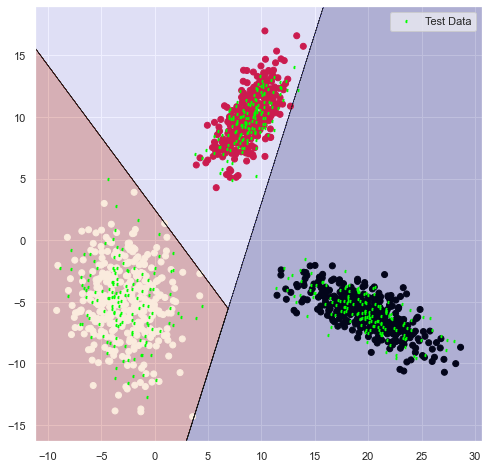

In [29]:
plot_decision_boundry_three(np.array(train[['X1','X2']]).reshape((-1,2)),np.array(train.label).reshape((-1,1)),W_1,W_2,W_3)
plt.scatter(*zip(*np.array(test[['X1','X2']])), marker = "$t$", color = "lime", label="Test Data",s = 5.5)
plt.legend()

## Printing the confusion matrix for train data

In [30]:
train

,X1,X2,label,class_1,class_2,class_3
1310,-6.20370,-8.8914,3,1,1,0
1281,-2.65480,-2.8808,3,1,1,0
1430,-3.71340,-8.9805,3,1,1,0
1401,-2.51590,-2.8631,3,1,1,0
597,7.57130,6.9618,2,1,0,1
...,...,...,...,...,...,...
1300,-1.22760,-6.0379,3,1,1,0
756,8.06060,8.8240,2,1,0,1
391,25.99400,-9.8415,1,0,1,1
1348,0.15938,-3.3475,3,1,1,0


In [31]:
train['Predicted'] = 0
train

,X1,X2,label,class_1,class_2,class_3,Predicted
1310,-6.20370,-8.8914,3,1,1,0,0
1281,-2.65480,-2.8808,3,1,1,0,0
1430,-3.71340,-8.9805,3,1,1,0,0
1401,-2.51590,-2.8631,3,1,1,0,0
597,7.57130,6.9618,2,1,0,1,0
...,...,...,...,...,...,...,...
1300,-1.22760,-6.0379,3,1,1,0,0
756,8.06060,8.8240,2,1,0,1,0
391,25.99400,-9.8415,1,0,1,1,0
1348,0.15938,-3.3475,3,1,1,0,0


In [32]:
c1 = np.array(predict(W_1,np.array(train[['X1','X2']]))).astype('uint8')
c2 = np.array(predict(W_2,np.array(train[['X1','X2']]))).astype('uint8')
c3 = np.array(predict(W_3,np.array(train[['X1','X2']]))).astype('uint8')
c1.shape

(1050, 1)

In [33]:
pred = np.zeros(c1.shape)
for i in range(len(c1)):
    if c2[i] == 0:
        pred[i] = 2
    if c3[i] ==0:
        pred[i] = 3
    if c1[i]==0:
        pred[i]=1

In [34]:
train.Predicted = pred.reshape((-1,1)).astype('uint')


In [35]:
### Now we have original label as label and predicted label as Predicted
train

,X1,X2,label,class_1,class_2,class_3,Predicted
1310,-6.20370,-8.8914,3,1,1,0,3
1281,-2.65480,-2.8808,3,1,1,0,3
1430,-3.71340,-8.9805,3,1,1,0,3
1401,-2.51590,-2.8631,3,1,1,0,3
597,7.57130,6.9618,2,1,0,1,2
...,...,...,...,...,...,...,...
1300,-1.22760,-6.0379,3,1,1,0,3
756,8.06060,8.8240,2,1,0,1,2
391,25.99400,-9.8415,1,0,1,1,1
1348,0.15938,-3.3475,3,1,1,0,3


### Once we have the original and predicted data we can comapre them to find the confusion matrix

In [36]:
original = np.array(train.label)
predicted = np.array(train.Predicted)
confuse(original,predicted,"Training")


Confusion Matrix for Training Data 
-------  -------  -------  -------
         Class 1  Class 2  Class 3
Class 1  344      0        0
Class 2  0        347      0
Class 3  0        0        359
-------  -------  -------  -------


The Classification accuracy for Training data is 
1.0


## Printing the confusion matrix for test

In [37]:
test

,X1,X2,label,class_1,class_2,class_3
875,9.1681,10.0190,2,1,0,1
101,20.0130,-4.4222,1,0,1,1
203,20.5460,-6.9786,1,0,1,1
1407,4.4470,-5.3436,3,1,1,0
362,20.2840,-6.5676,1,0,1,1
...,...,...,...,...,...,...
994,8.7465,9.9181,2,1,0,1
930,9.1179,9.1505,2,1,0,1
1214,-1.0803,-10.9330,3,1,1,0
164,18.1420,-4.9030,1,0,1,1


In [38]:
test['Predicted'] = 0
test

,X1,X2,label,class_1,class_2,class_3,Predicted
875,9.1681,10.0190,2,1,0,1,0
101,20.0130,-4.4222,1,0,1,1,0
203,20.5460,-6.9786,1,0,1,1,0
1407,4.4470,-5.3436,3,1,1,0,0
362,20.2840,-6.5676,1,0,1,1,0
...,...,...,...,...,...,...,...
994,8.7465,9.9181,2,1,0,1,0
930,9.1179,9.1505,2,1,0,1,0
1214,-1.0803,-10.9330,3,1,1,0,0
164,18.1420,-4.9030,1,0,1,1,0


In [39]:
c1 = np.array(predict(W_1,np.array(test[['X1','X2']]))).astype('uint8')
c2 = np.array(predict(W_2,np.array(test[['X1','X2']]))).astype('uint8')
c3 = np.array(predict(W_3,np.array(test[['X1','X2']]))).astype('uint8')
c1.shape

(450, 1)

In [40]:
pred = np.zeros(c1.shape)
for i in range(len(c1)):
    if c2[i] == 0:
        pred[i] = 2
    if c3[i] ==0:
        pred[i] = 3
    if c1[i]==0:
        pred[i]=1

In [41]:
test.Predicted = pred.reshape((-1,1)).astype('uint')

In [42]:
### Now we have original label as label and predicted label as Predicted
test

,X1,X2,label,class_1,class_2,class_3,Predicted
875,9.1681,10.0190,2,1,0,1,2
101,20.0130,-4.4222,1,0,1,1,1
203,20.5460,-6.9786,1,0,1,1,1
1407,4.4470,-5.3436,3,1,1,0,3
362,20.2840,-6.5676,1,0,1,1,1
...,...,...,...,...,...,...,...
994,8.7465,9.9181,2,1,0,1,2
930,9.1179,9.1505,2,1,0,1,2
1214,-1.0803,-10.9330,3,1,1,0,3
164,18.1420,-4.9030,1,0,1,1,1


In [43]:
original = np.array(test.label)
predicted = np.array(test.Predicted)

confuse(original,predicted,"Testing")

Confusion Matrix for Testing Data 
-------  -------  -------  -------
         Class 1  Class 2  Class 3
Class 1  156      0        0
Class 2  1        152      0
Class 3  0        0        141
-------  -------  -------  -------


The Classification accuracy for Testing data is 
0.9977777777777778


# For Non Linear Class

In [44]:
## Function to create datafrom non-linear data
def extract_points_nl(path):
    with open(path, "r") as f:
        lines = f.readlines()
        print(len(lines))
        print(lines[0])
    data_points = []
    for line in lines[1:501]:
        line = line.strip()
        first, second = line.split()
        data_points.append([float(first),float(second), 1])
    for line in lines[501:1001]:
        line = line.strip()
        first, second = line.split()
        data_points.append([float(first),float(second), 2])
    for line in lines[1001:]:
        line = line.strip()
        first, second = line.split()
        data_points.append([float(first),float(second), 3])
    return data_points

In [45]:
data_nl = extract_points_nl(r"D:\study\Sem 2\Deep Learning\Assignmnet\Assignment 1\Group30\Group30\Classification\NLS_Group30.txt")

1501
First 500 examples - class1; next 500 examples - class 2 and the last 500 examples - class3.



In [46]:
non_linear = pd.DataFrame(data_nl, columns=['X1','X2','label'])
non_linear

,X1,X2,label
0,-2.805403,0.479090,1
1,-2.863374,0.540135,1
2,-1.844841,0.982728,1
3,-1.289484,1.021271,1
4,-1.056815,0.487639,1
...,...,...,...
1495,3.108763,0.198164,3
1496,1.833366,1.175833,3
1497,3.066507,-0.256314,3
1498,3.071702,0.306087,3


## Show the classes

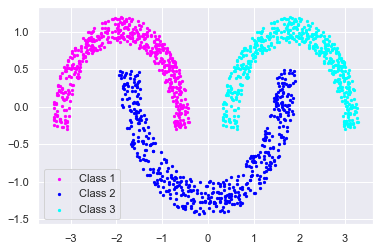

In [47]:
cl1 = non_linear[non_linear.label==1]
cl2 = non_linear[non_linear.label==2]
cl3 = non_linear[non_linear.label==3]

sns.set()
plt.scatter(cl1.X1, cl1.X2, color = 'magenta', s = 5, label = "Class 1")
plt.scatter(cl2.X1, cl2.X2, color = 'blue', s = 5, label = "Class 2")
plt.scatter(cl3.X1, cl3.X2, color = 'cyan', s = 5, label = "Class 3")
plt.legend()


## In the Non-linear dataframe we concatinate 3 columns 
* class1 - consider class 1 = 0 and rest as class 1
* class2 - consider class 2 = 0 and rest as class 1
* class3 - consider class 3 = 0 and rest as class 1

In [48]:
non_linear['class_1'] = 0
non_linear['class_2'] = 0
non_linear['class_3'] = 0

non_linear

,X1,X2,label,class_1,class_2,class_3
0,-2.805403,0.479090,1,0,0,0
1,-2.863374,0.540135,1,0,0,0
2,-1.844841,0.982728,1,0,0,0
3,-1.289484,1.021271,1,0,0,0
4,-1.056815,0.487639,1,0,0,0
...,...,...,...,...,...,...
1495,3.108763,0.198164,3,0,0,0
1496,1.833366,1.175833,3,0,0,0
1497,3.066507,-0.256314,3,0,0,0
1498,3.071702,0.306087,3,0,0,0


## feed the class1 to class3 with values considering the problem as 2 class problem

In [49]:
non_linear.class_1[non_linear['label']==1] = 0
non_linear.class_1[non_linear['label']!=1] = 1

non_linear.class_2[non_linear['label']==2] = 0
non_linear.class_2[non_linear['label']!=2] = 1

non_linear.class_3[non_linear['label']==3] = 0
non_linear.class_3[non_linear['label']!=3] = 1

In [50]:
non_linear

,X1,X2,label,class_1,class_2,class_3
0,-2.805403,0.479090,1,0,1,1
1,-2.863374,0.540135,1,0,1,1
2,-1.844841,0.982728,1,0,1,1
3,-1.289484,1.021271,1,0,1,1
4,-1.056815,0.487639,1,0,1,1
...,...,...,...,...,...,...
1495,3.108763,0.198164,3,1,1,0
1496,1.833366,1.175833,3,1,1,0
1497,3.066507,-0.256314,3,1,1,0
1498,3.071702,0.306087,3,1,1,0


In [51]:
non_linear = non_linear.sample(frac=1)

In [52]:
nl_train = non_linear.iloc[0:1050,:]
nl_test = non_linear.iloc[1050:,:]

In [53]:
nl_train

,X1,X2,label,class_1,class_2,class_3
903,-1.027870,-0.747609,2,1,0,1
536,1.563670,-0.270138,2,1,0,1
288,-2.913293,0.753854,1,0,1,1
693,1.145352,-1.024888,2,1,0,1
1369,0.928696,0.808340,3,1,1,0
...,...,...,...,...,...,...
587,-1.046949,-0.885482,2,1,0,1
654,0.517625,-1.168330,2,1,0,1
1450,1.213295,1.044319,3,1,1,0
1352,2.751256,0.837500,3,1,1,0


In [54]:
nl_test

,X1,X2,label,class_1,class_2,class_3
15,-0.563281,-0.023827,1,0,1,1
1409,3.004523,0.478370,3,1,1,0
931,1.836705,0.062571,2,1,0,1
1293,0.735270,0.219011,3,1,1,0
827,-0.271518,-1.390828,2,1,0,1
...,...,...,...,...,...,...
783,1.594151,0.435447,2,1,0,1
909,1.495016,0.168291,2,1,0,1
1037,3.092696,0.264297,3,1,1,0
1231,0.550389,0.091737,3,1,1,0


## We will apply the perceptron for each class seprately

In [55]:
nl_train_1 = nl_train[['X1','X2']]
nl_label_1 = nl_train.class_1

nl_train_2 = nl_train[['X1','X2']]
nl_label_2 = nl_train.class_2

nl_train_3 = nl_train[['X1','X2']]
nl_label_3 = nl_train.class_3

In [56]:
nl_train_1 = np.array(nl_train_1).reshape((-1,2))
nl_train_2 = np.array(nl_train_2).reshape((-1,2))
nl_train_3 = np.array(nl_train_3).reshape((-1,2))

nl_label_1 = np.array(nl_label_1).reshape((-1,1))
nl_label_2 = np.array(nl_label_2).reshape((-1,1))
nl_label_3 = np.array(nl_label_3).reshape((-1,1))

### Applying the perceptron individualy 

In [57]:
nl_W_1, nl_ep_vs_er_1 = train_neuron(nl_train_1, nl_label_1)

nl_W_2, nl_ep_vs_er_2 = train_neuron(nl_train_2, nl_label_2)

nl_W_3, nl_ep_vs_er_3 = train_neuron(nl_train_3, nl_label_3)

## Plotting the decision boundary for individual classes

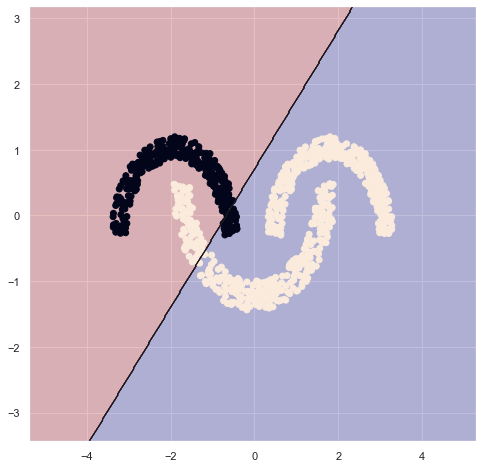

In [58]:
plot_decision_boundry(nl_train_1,nl_label_1,nl_W_1)

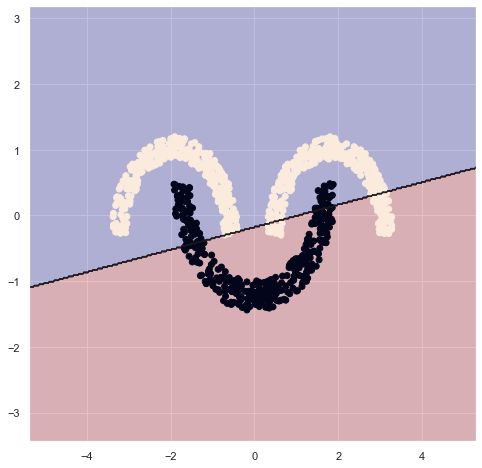

In [59]:
plot_decision_boundry(nl_train_2,nl_label_2,nl_W_2)

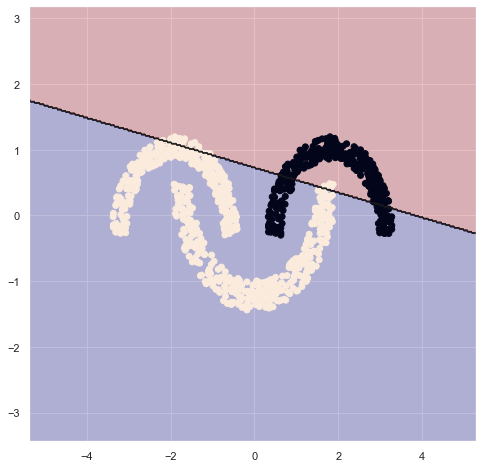

In [60]:
plot_decision_boundry(nl_train_3,nl_label_3,nl_W_3)

## Plotting the error vs epoch for all three cases

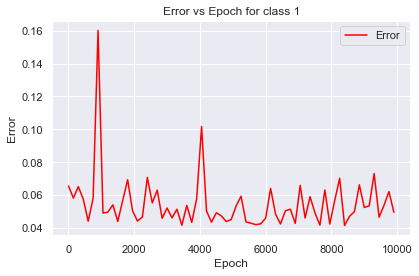

In [61]:
sns.set()
plt.plot(*zip(*nl_ep_vs_er_1[::150]), color = 'red', label = "Error")
plt.title("Error vs Epoch for class 1")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.tight_layout()

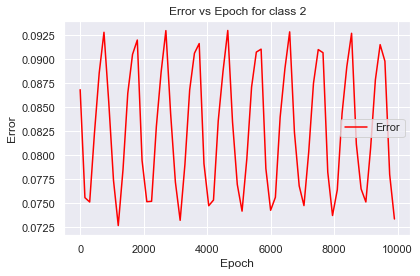

In [62]:
sns.set()
plt.plot(*zip(*nl_ep_vs_er_2[::150]), color = 'red', label = "Error")
plt.title("Error vs Epoch for class 2")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.tight_layout()

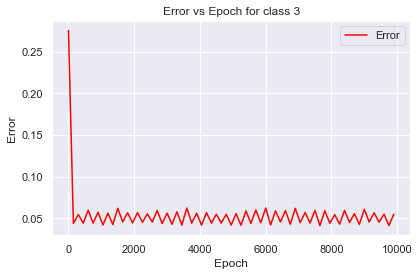

In [63]:
sns.set()
plt.plot(*zip(*nl_ep_vs_er_3[::150]), color = 'red', label = "Error")
plt.title("Error vs Epoch for class 3")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.tight_layout()


## Plotting decision surface together

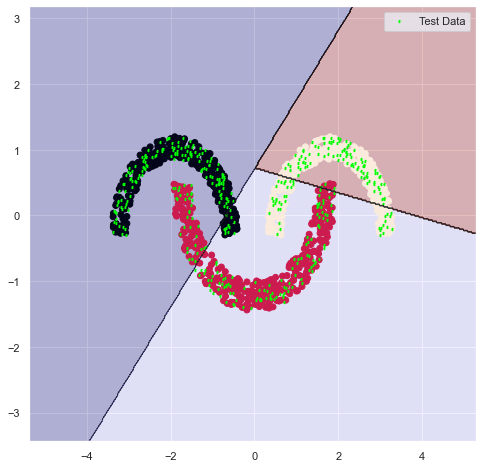

In [64]:
plot_decision_boundry_three(np.array(nl_train[['X1','X2']]).reshape((-1,2)),np.array(nl_train.label).reshape((-1,1)),nl_W_1,nl_W_2,nl_W_3)
plt.scatter(*zip(*np.array(nl_test[['X1','X2']])), marker = '$t$', color = "lime", label = "Test Data",s = 5.5)
plt.legend()

## Printing the confusion matrix for train data

In [65]:
nl_train

,X1,X2,label,class_1,class_2,class_3
903,-1.027870,-0.747609,2,1,0,1
536,1.563670,-0.270138,2,1,0,1
288,-2.913293,0.753854,1,0,1,1
693,1.145352,-1.024888,2,1,0,1
1369,0.928696,0.808340,3,1,1,0
...,...,...,...,...,...,...
587,-1.046949,-0.885482,2,1,0,1
654,0.517625,-1.168330,2,1,0,1
1450,1.213295,1.044319,3,1,1,0
1352,2.751256,0.837500,3,1,1,0


In [66]:
nl_train['Predicted'] = 0
nl_train

,X1,X2,label,class_1,class_2,class_3,Predicted
903,-1.027870,-0.747609,2,1,0,1,0
536,1.563670,-0.270138,2,1,0,1,0
288,-2.913293,0.753854,1,0,1,1,0
693,1.145352,-1.024888,2,1,0,1,0
1369,0.928696,0.808340,3,1,1,0,0
...,...,...,...,...,...,...,...
587,-1.046949,-0.885482,2,1,0,1,0
654,0.517625,-1.168330,2,1,0,1,0
1450,1.213295,1.044319,3,1,1,0,0
1352,2.751256,0.837500,3,1,1,0,0


In [67]:

c1 = np.array(predict(nl_W_1,np.array(nl_train[['X1','X2']]))).astype('uint8')
c2 = np.array(predict(nl_W_2,np.array(nl_train[['X1','X2']]))).astype('uint8')
c3 = np.array(predict(nl_W_3,np.array(nl_train[['X1','X2']]))).astype('uint8')
c1.shape

(1050, 1)

In [68]:
pred = np.zeros(c1.shape)
for i in range(len(c1)):
    if c2[i] == 0:
        pred[i] = 2
    if c3[i] ==0:
        pred[i] = 3
    if c1[i]==0:
        pred[i]=1

In [69]:
nl_train.Predicted = pred.reshape((-1,1)).astype('uint')

In [70]:
### Now we have original label as label and predicted label as Predicted
nl_train

,X1,X2,label,class_1,class_2,class_3,Predicted
903,-1.027870,-0.747609,2,1,0,1,2
536,1.563670,-0.270138,2,1,0,1,2
288,-2.913293,0.753854,1,0,1,1,1
693,1.145352,-1.024888,2,1,0,1,2
1369,0.928696,0.808340,3,1,1,0,3
...,...,...,...,...,...,...,...
587,-1.046949,-0.885482,2,1,0,1,2
654,0.517625,-1.168330,2,1,0,1,2
1450,1.213295,1.044319,3,1,1,0,3
1352,2.751256,0.837500,3,1,1,0,3


### Once we have the original and predicted data we can comapre them to find the confusion matrix

In [71]:
original = np.array(nl_train.label)
predicted = np.array(nl_train.Predicted)

confuse(original,predicted,"Training")

Confusion Matrix for Training Data 
-------  -------  -------  -------
         Class 1  Class 2  Class 3
Class 1  303      0        0
Class 2  79       244      5
Class 3  0        64       247
-------  -------  -------  -------


The Classification accuracy for Training data is 
0.8428874734607219


## Printing the confusion matrix for test

In [72]:
nl_test

,X1,X2,label,class_1,class_2,class_3
15,-0.563281,-0.023827,1,0,1,1
1409,3.004523,0.478370,3,1,1,0
931,1.836705,0.062571,2,1,0,1
1293,0.735270,0.219011,3,1,1,0
827,-0.271518,-1.390828,2,1,0,1
...,...,...,...,...,...,...
783,1.594151,0.435447,2,1,0,1
909,1.495016,0.168291,2,1,0,1
1037,3.092696,0.264297,3,1,1,0
1231,0.550389,0.091737,3,1,1,0


In [73]:
nl_test['Predicted'] = 0
nl_test

,X1,X2,label,class_1,class_2,class_3,Predicted
15,-0.563281,-0.023827,1,0,1,1,0
1409,3.004523,0.478370,3,1,1,0,0
931,1.836705,0.062571,2,1,0,1,0
1293,0.735270,0.219011,3,1,1,0,0
827,-0.271518,-1.390828,2,1,0,1,0
...,...,...,...,...,...,...,...
783,1.594151,0.435447,2,1,0,1,0
909,1.495016,0.168291,2,1,0,1,0
1037,3.092696,0.264297,3,1,1,0,0
1231,0.550389,0.091737,3,1,1,0,0


In [74]:
c1 = np.array(predict(nl_W_1,np.array(nl_test[['X1','X2']]))).astype('uint8')
c2 = np.array(predict(nl_W_2,np.array(nl_test[['X1','X2']]))).astype('uint8')
c3 = np.array(predict(nl_W_3,np.array(nl_test[['X1','X2']]))).astype('uint8')
c1.shape

(450, 1)

In [75]:
pred = np.zeros(c1.shape)
for i in range(len(c1)):
    if c2[i] == 0:
        pred[i] = 2
    if c3[i] ==0:
        pred[i] = 3
    if c1[i]==0:
        pred[i]=1

In [76]:
nl_test.Predicted = pred.reshape((-1,1)).astype('uint')

In [77]:
### Now we have original label as label and predicted label as Predicted
nl_test

,X1,X2,label,class_1,class_2,class_3,Predicted
15,-0.563281,-0.023827,1,0,1,1,0
1409,3.004523,0.478370,3,1,1,0,3
931,1.836705,0.062571,2,1,0,1,2
1293,0.735270,0.219011,3,1,1,0,0
827,-0.271518,-1.390828,2,1,0,1,2
...,...,...,...,...,...,...,...
783,1.594151,0.435447,2,1,0,1,3
909,1.495016,0.168291,2,1,0,1,0
1037,3.092696,0.264297,3,1,1,0,3
1231,0.550389,0.091737,3,1,1,0,0


In [78]:
original = np.array(nl_test.label)
predicted = np.array(nl_test.Predicted)

confuse(original,predicted,"Testing")

Confusion Matrix for Testing Data 
-------  -------  -------  -------
         Class 1  Class 2  Class 3
Class 1  150      1        0
Class 2  36       99       3
Class 3  0        16       98
-------  -------  -------  -------


The Classification accuracy for Testing data is 
0.8610421836228288
